In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# 1.Data Collection

In [2]:
now=datetime.now()
start=datetime(now.year-10,now.month,now.day)
end=now
ticker='AAPL'
df=yf.download(ticker,start,end)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-02-22,21.941429,21.945960,21.724008,21.812335,137123200
2016-02-23,21.445438,21.855368,21.413731,21.832720,127770400
2016-02-24,21.764767,21.828181,21.135151,21.284629,145022800
2016-02-25,21.914251,21.914251,21.572265,21.753450,110330800
2016-02-26,21.948227,22.199619,21.873488,22.013905,115964400
...,...,...,...,...,...
2026-02-13,255.779999,262.230011,255.449997,262.010010,56290700
2026-02-17,263.880005,266.290009,255.539993,258.049988,58469100


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-02-22,21.941429,21.945960,21.724008,21.812335,137123200
2016-02-23,21.445438,21.855368,21.413731,21.832720,127770400
2016-02-24,21.764767,21.828181,21.135151,21.284629,145022800
2016-02-25,21.914251,21.914251,21.572265,21.753450,110330800
2016-02-26,21.948227,22.199619,21.873488,22.013905,115964400


# 2.Data Exploration&Visualization

In [4]:
type(df)

pandas.DataFrame

In [5]:
df.shape

(2515, 5)

In [6]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,117.395009,118.565441,116.115611,117.290157,9.945082e+07
std,74.451142,75.175281,73.670507,74.394713,5.574516e+07
min,20.584810,20.887864,20.386574,20.507340,1.791060e+07
25%,42.670334,43.075946,42.075179,42.644277,6.027425e+07
50%,123.123848,124.775869,122.161149,123.478243,8.755800e+07
75%,173.781044,175.634659,171.826267,173.949173,1.214723e+08
max,285.922455,288.350192,283.035157,285.932471,4.584084e+08


In [8]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [9]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-02-22,21.941429,21.945960,21.724008,21.812335,137123200
2016-02-23,21.445438,21.855368,21.413731,21.832720,127770400
2016-02-24,21.764767,21.828181,21.135151,21.284629,145022800
2016-02-25,21.914251,21.914251,21.572265,21.753450,110330800
2016-02-26,21.948227,22.199619,21.873488,22.013905,115964400


In [10]:
df=df.reset_index()

In [11]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2016-02-22,21.941429,21.945960,21.724008,21.812335,137123200
1,2016-02-23,21.445438,21.855368,21.413731,21.832720,127770400
2,2016-02-24,21.764767,21.828181,21.135151,21.284629,145022800
3,2016-02-25,21.914251,21.914251,21.572265,21.753450,110330800
4,2016-02-26,21.948227,22.199619,21.873488,22.013905,115964400


Text(0, 0.5, 'Close price')

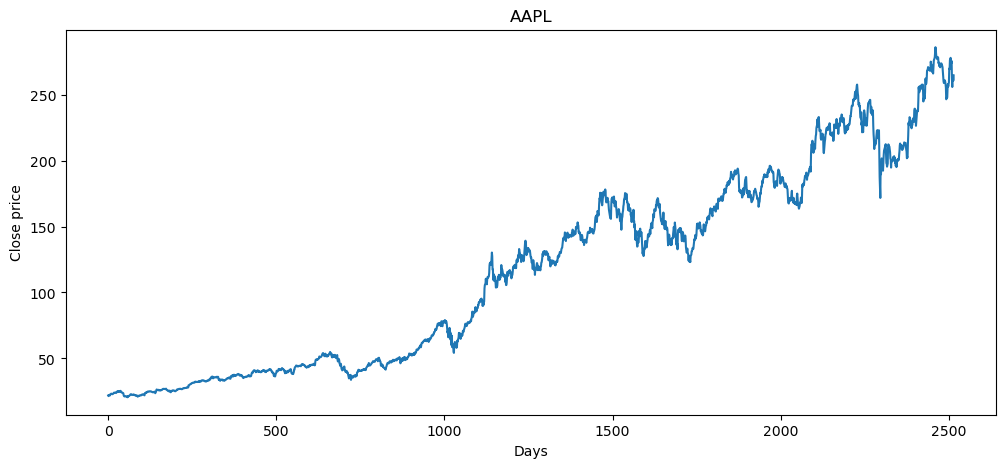

In [12]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days'),
plt.ylabel('Close price')

# 3.Feature Engineering

### 100 days Moving average

In [13]:
df['MA_100']=df.Close.rolling(100).mean()
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2016-02-22,21.941429,21.945960,21.724008,21.812335,137123200,NaN
1,2016-02-23,21.445438,21.855368,21.413731,21.832720,127770400,NaN
2,2016-02-24,21.764767,21.828181,21.135151,21.284629,145022800,NaN
3,2016-02-25,21.914251,21.914251,21.572265,21.753450,110330800,NaN
4,2016-02-26,21.948227,22.199619,21.873488,22.013905,115964400,NaN
...,...,...,...,...,...,...,...
98,2016-07-12,22.198063,22.261863,22.129706,22.141098,96670000,NaN
99,2016-07-13,22.072737,22.255023,22.065899,22.195781,103568800,22.720390
100,2016-07-14,22.510227,22.555798,22.175274,22.191224,155676000,22.726078


Text(0, 0.5, '100 days moving avg')

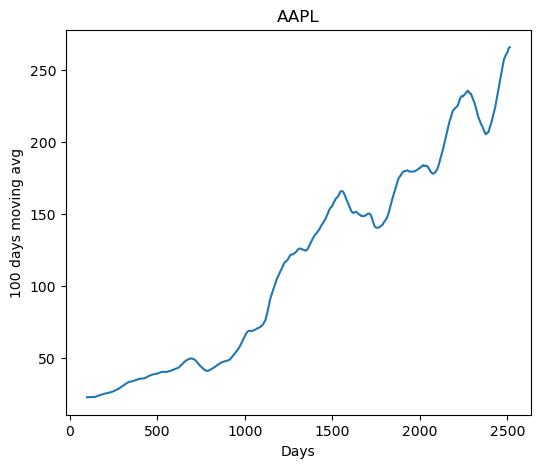

In [14]:
plt.figure(figsize=(6,5))
plt.plot(df['MA_100'])
plt.title(ticker)
plt.xlabel('Days'),
plt.ylabel('100 days moving avg')

Text(0, 0.5, 'Price')

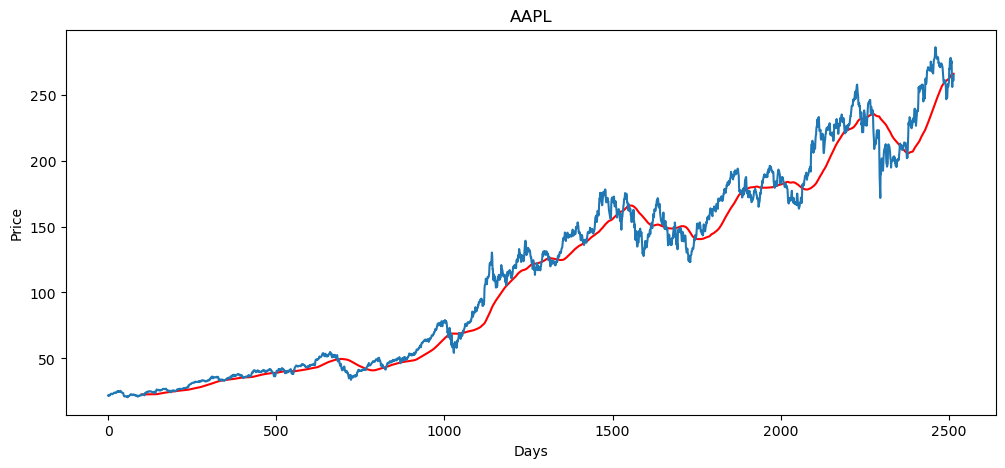

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df['MA_100'],'r')
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days'),
plt.ylabel('Price')

### 200 day moving Avg

In [16]:
df['MA_200']=df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2016-02-22,21.941429,21.945960,21.724008,21.812335,137123200,NaN,NaN
1,2016-02-23,21.445438,21.855368,21.413731,21.832720,127770400,NaN,NaN
2,2016-02-24,21.764767,21.828181,21.135151,21.284629,145022800,NaN,NaN
3,2016-02-25,21.914251,21.914251,21.572265,21.753450,110330800,NaN,NaN
4,2016-02-26,21.948227,22.199619,21.873488,22.013905,115964400,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-12-01,25.212254,25.546146,25.106330,25.414892,148347600,25.102207,NaN
199,2016-12-02,25.306671,25.350421,25.064887,25.138573,106112000,25.134546,23.927468
200,2016-12-05,25.124754,25.336602,24.926722,25.329694,137298000,25.160691,23.943385


Text(0, 0.5, '200 days moving avg')

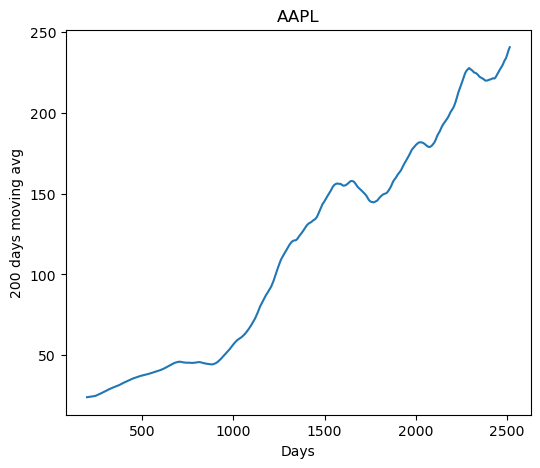

In [17]:
plt.figure(figsize=(6,5))
plt.plot(df['MA_200'])
plt.title(ticker)
plt.xlabel('Days'),
plt.ylabel('200 days moving avg')

Text(0, 0.5, 'Price')

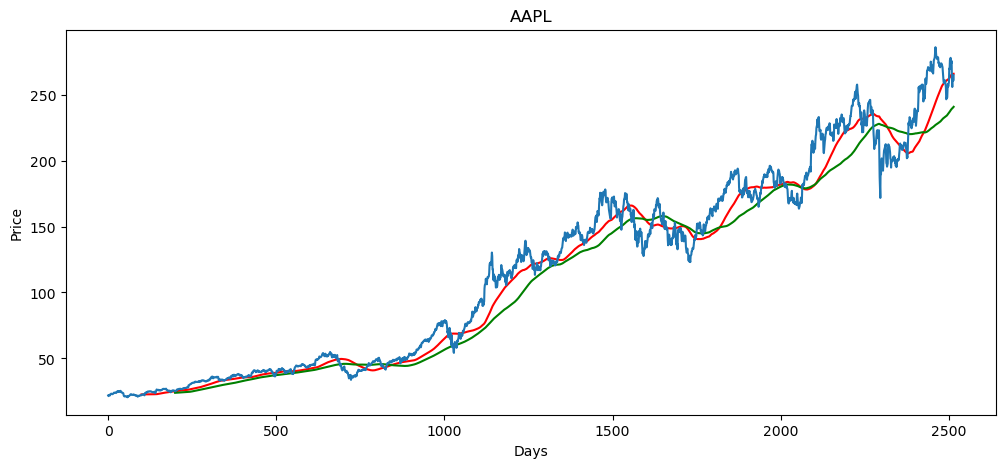

In [18]:
plt.figure(figsize=(12,5))
plt.plot(df['MA_100'],'r')
plt.plot(df['MA_200'],'g')
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days'),
plt.ylabel('Price')

### Percentage Change

In [19]:
df['percentage_change']=df.Close.pct_change()
df[['Close','percentage_change']]

Price,Close,percentage_change
Ticker,AAPL,
0,21.941429,NaN
1,21.445438,-0.022605
2,21.764767,0.014890
3,21.914251,0.006868
4,21.948227,0.001550
...,...,...
2510,255.779999,-0.022733
2511,263.880005,0.031668
2512,264.350006,0.001781


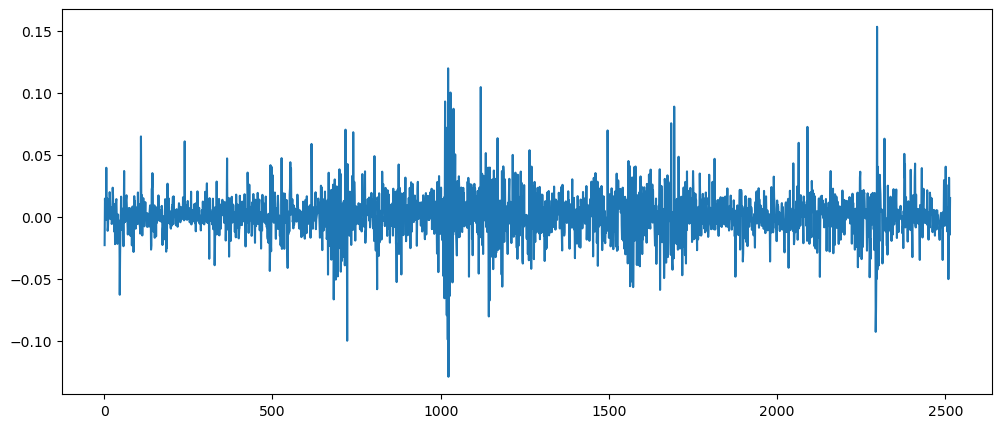

In [20]:
plt.figure(figsize=(12,5))
plt.plot(df.percentage_change)

# 3.Data Preprocessing

In [21]:
df.shape

(2515, 9)

In [22]:
# splitting data in train and test

data_training=pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing=pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])
print(data_training)
print(data_testing)

Ticker        AAPL
0        21.941429
1        21.445438
2        21.764767
3        21.914251
4        21.948227
...            ...
1755    148.488785
1756    148.853546
1757    151.652985
1758    151.012268
1759    153.111832

[1760 rows x 1 columns]
Ticker        AAPL
1760    151.514999
1761    150.371552
1762    146.359650
1763    146.783524
1764    147.266525
...            ...
2510    255.779999
2511    263.880005
2512    264.350006
2513    260.579987
2514    264.579987

[755 rows x 1 columns]


In [23]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [24]:
data_training_arr=scaler.fit_transform(data_training)
data_training_arr.shape

(1760, 1)

# 5.Sequence Creation

In [25]:
x_train=[]
y_train=[]

for i in range(100,data_training_arr.shape[0]):
    x_train.append(data_training_arr[i-100:i])
    y_train.append(data_training_arr[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [26]:
type(x_train)

numpy.ndarray

In [27]:
# x_train.ndim
x_train

array([[[0.00861242],
        [0.00546365],
        [0.00749089],
        ...,
        [0.00960519],
        [0.01024165],
        [0.00944602]],

       [[0.00546365],
        [0.00749089],
        [0.00843989],
        ...,
        [0.01024165],
        [0.00944602],
        [0.01222341]],

       [[0.00749089],
        [0.00843989],
        [0.00865558],
        ...,
        [0.00944602],
        [0.01222341],
        [0.01220896]],

       ...,

       [[0.84804511],
        [0.82820864],
        [0.82209559],
        ...,
        [0.81855239],
        [0.8119915 ],
        [0.81430717]],

       [[0.82820864],
        [0.82209559],
        [0.80768575],
        ...,
        [0.8119915 ],
        [0.81430717],
        [0.83207926]],

       [[0.82209559],
        [0.80768575],
        [0.8098068 ],
        ...,
        [0.81430717],
        [0.83207926],
        [0.8280117 ]]])

In [28]:
# y_train.ndim
y_train

array([0.01222341, 0.01220896, 0.01372785, ..., 0.83207926, 0.8280117 ,
       0.84134067])

# 6.Model Building

In [29]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,Input

In [30]:
model= Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=128,activation='tanh',return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7.Model training

In [31]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - loss: 0.0112
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - loss: 6.8785e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - loss: 6.1697e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - loss: 7.0183e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - loss: 6.1096e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 5.8419e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 5.7576e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - loss: 5.6913e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - loss: 6.2668e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - loss: 5.0525e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 5.0740e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 5.0335e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - loss: 4.2559e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - loss: 4.5079e-04
Epoc

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ lstm (LSTM)              │ (None, 100, 128)  │    66,560 │
├──────────────────────────┼───────────────────┼───────────┤
│ lstm_1 (LSTM)            │ (None, 64)        │    49,408 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense (Dense)            │ (None, 25)        │     1,625 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_1 (Dense)          │ (None, 1)         │        26 │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [34]:
# Save the model
model.save('stock_prediction_model.keras')

# 8.Prediction

In [37]:
data_training.tail(100)

Ticker,AAPL
1660,147.810547
1661,148.144653
1662,149.117386
1663,147.230835
1664,139.999008
...,...
1755,148.488785
1756,148.853546
1757,151.652985
1758,151.012268


In [35]:
data_testing

Ticker,AAPL
1760,151.514999
1761,150.371552
1762,146.359650
1763,146.783524
1764,147.266525
...,...
2510,255.779999
2511,263.880005
2512,264.350006
2513,260.579987


In [38]:
past_100_days=data_training.tail(100)

In [40]:
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)
final_df

Ticker,AAPL
0,147.810547
1,148.144653
2,149.117386
3,147.230835
4,139.999008
...,...
850,255.779999
851,263.880005
852,264.350006
853,260.579987


In [41]:
data_testing_arr=scaler.fit_transform(data_testing)
data_testing_arr

array([[0.05802942],
       [0.05001577],
       [0.02189908],
       [0.02486972],
       [0.02825475],
       [0.00967162],
       [0.01803058],
       [0.01450728],
       [0.        ],
       [0.00414504],
       [0.03951527],
       [0.0588583 ],
       [0.04345296],
       [0.05222641],
       [0.03647554],
       [0.02203746],
       [0.03564677],
       [0.0502921 ],
       [0.05305539],
       [0.07281292],
       [0.06694093],
       [0.08352056],
       [0.09650814],
       [0.08649142],
       [0.09409015],
       [0.10320922],
       [0.08959991],
       [0.08524762],
       [0.10680139],
       [0.11778558],
       [0.13533248],
       [0.14410592],
       [0.1403757 ],
       [0.1274571 ],
       [0.13367461],
       [0.11550576],
       [0.10700886],
       [0.10217299],
       [0.1398918 ],
       [0.13747413],
       [0.1376123 ],
       [0.14617839],
       [0.15419204],
       [0.14742198],
       [0.13616146],
       [0.13830312],
       [0.1275265 ],
       [0.127

In [44]:
x_test=[]
y_test=[]
for i in range(100,data_testing_arr.shape[0]):
    x_test.append(data_testing_arr[i-100:i])
    y_test.append(data_testing_arr[i,0])

In [45]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [46]:
y_predicted=model.predict(x_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step


In [48]:
y_predicted=scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test=scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

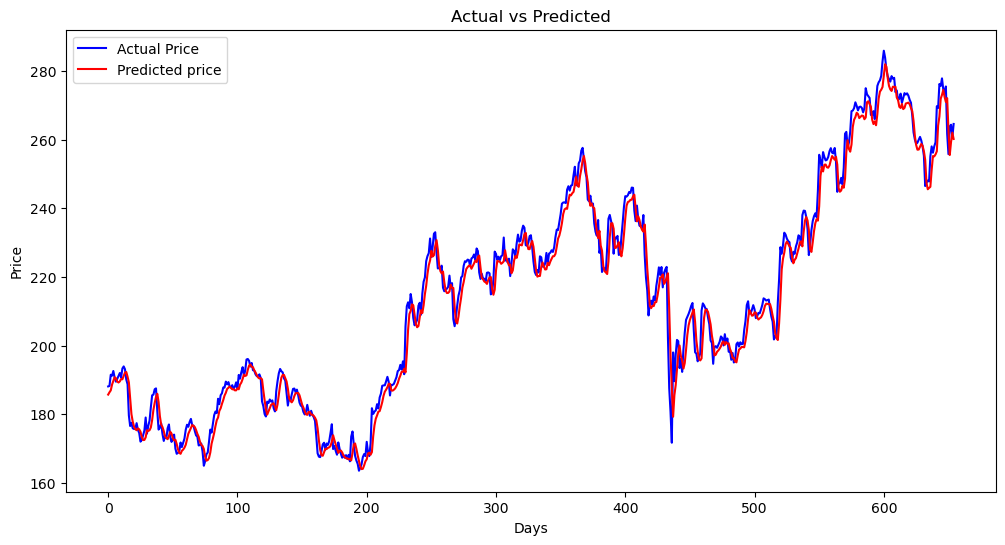

In [54]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Actual Price')
plt.plot(y_predicted,'r',label='Predicted price')
plt.title('Actual vs Predicted')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend()


(160.0, 280.0)

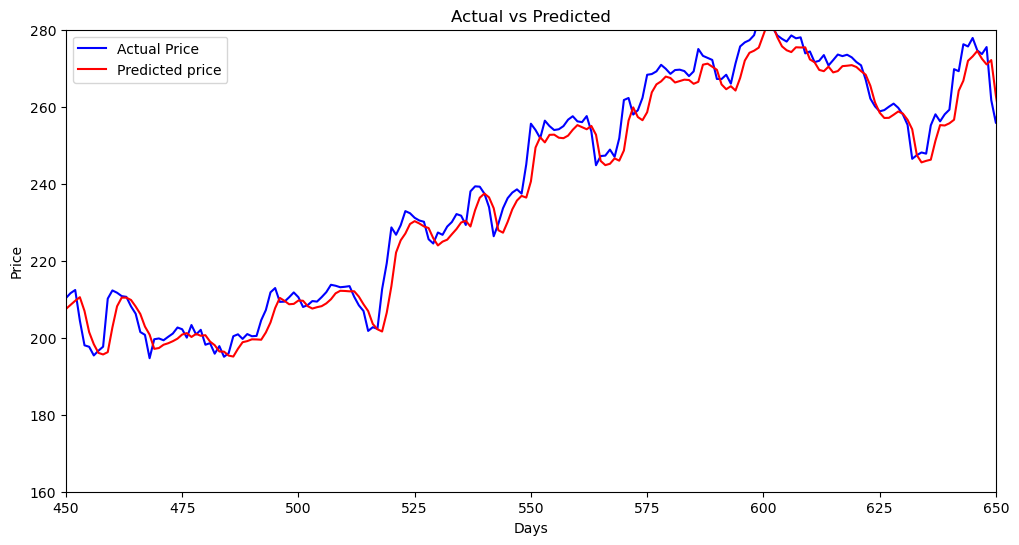

In [57]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Actual Price')
plt.plot(y_predicted,'r',label='Predicted price')
plt.title('Actual vs Predicted')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend()
plt.xlim(450,650)
plt.ylim(160,280)

# 9.Model Evaluation

In [63]:
# Mean Squared Error(MSE)
from sklearn.metrics import mean_squared_error,r2_score

In [59]:
mse=mean_squared_error(y_test,y_predicted)
print(f"Mean Squared Error (MSE):{mse}")

Mean Squared Error (MSE):18.709251711461764


In [61]:
#Root Mean Squared Error(MSE)
rmse=np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE):{rmse}")

Root Mean Squared Error (RMSE):4.3254192526808035


In [64]:
# R-Squared
r2=r2_score(y_test,y_predicted)
print(f"R-Squared:{r2}")

R-Squared:0.981154366091296
